<a href="https://colab.research.google.com/github/samikshyasanskruti/DeepLearning-with-TesorFlow/blob/main/ASSIGNMENT_3(DLWTF_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEEP CONVOLUTION NEURAL-NETWORK**

**SAMIKSHYA SANSKRUTI SWAIN**

**REG. NO-2341019634**

**1.Write a python code to implement convolutional neural network for LeNet architecture on the MNIST dataset using keras.**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#  DATA PREPROCESSING
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshape to (28,28,1) and normalize
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0


In [ ]:
#  MODEL ARCHITECTURE (LeNet)
model = models.Sequential([
    layers.Conv2D(6, (5,5), activation='tanh', padding='same', input_shape=(28,28,1)),
    layers.AveragePooling2D((2,2)),

    layers.Conv2D(16, (5,5), activation='tanh'),
    layers.AveragePooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])



In [ ]:
#  COMPILATION + TRAINING
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 33ms/step - accuracy: 0.8752 - loss: 0.4268 - val_accuracy: 0.9663 - val_loss: 0.1165
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9695 - loss: 0.1003 - val_accuracy: 0.9754 - val_loss: 0.0802
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9812 - loss: 0.0619 - val_accuracy: 0.9795 - val_loss: 0.0662
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.9863 - loss: 0.0438 - val_accuracy: 0.9813 - val_loss: 0.0606
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9890 - loss: 0.0362 - val_accuracy: 0.9833 - val_loss: 0.0569


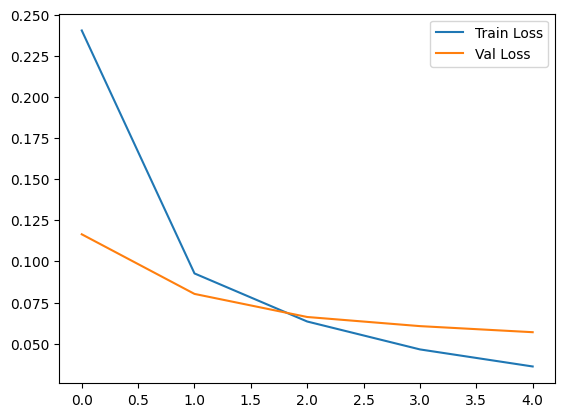

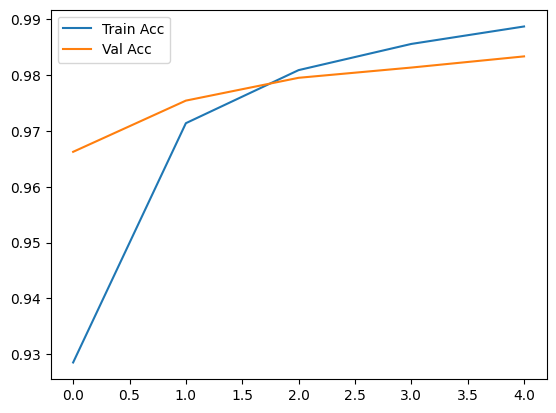

In [ ]:
#  TRAINING VS VALIDATION GRAPH
h = history.history

plt.plot(h["loss"], label="Train Loss")
plt.plot(h["val_loss"], label="Val Loss")
plt.legend()
plt.show()

plt.plot(h["accuracy"], label="Train Acc")
plt.plot(h["val_accuracy"], label="Val Acc")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted digit = 0
Actual digit = 0


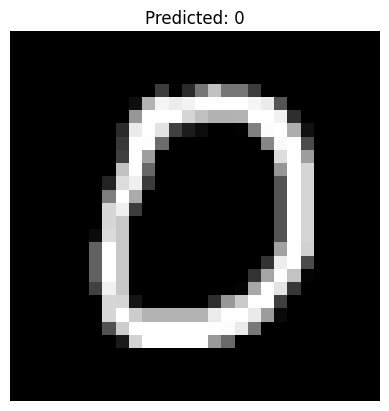

In [ ]:
# PREDICT DIGIT
idx = 10
pred = model.predict(x_test[idx:idx+1])
predicted_digit = np.argmax(pred)
print("Predicted digit =", predicted_digit)
print("Actual digit =", y_test[idx])

plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {predicted_digit}")
plt.axis('off')
plt.show()

**THEORY QUESTIONS**

**a.Calculate the output shape after each Conv2D and MaxPooling2D layer.**

	•	Input image size is 28 × 28 × 1
	•	After Conv2D (6 filters, 5×5) → 24 × 24 × 6
	•	After MaxPooling (2×2) → 12 × 12 × 6
	•	After Conv2D (16 filters, 5×5) → 8 × 8 × 16
	•	After MaxPooling (2×2) → 4 × 4 × 16

**b. Why do we reshape images to (28,28,1) and divide by 255 ?**
*  Images are reshaped to (28,28,1) to include the channel dimension required by convolutional layers.
*  Dividing by 255 normalizes pixel values to the range [0,1], which improves training stability and speeds up convergence.

**c. What loss function is used, and why is it suitable here?**
*   Categorical Cross-Entropy loss is used because MNIST is a multi-class classification problem with 10 classes.
*   It works well with one-hot encoded labels and measures the difference between true and predicted class probabilities.

**d. Training vs Validation Loss and Accuracy**
*   Training loss and accuracy show how well the model learns on training data, while validation loss and accuracy indicate the model’s generalization ability.

 A small gap between them suggests good model performance without overfitting

**e. Print the predicted digit**

The predicted digit is obtained by applying the argmax function on the model’s output probabilities. It represents the class with the highest confidence among digits 0 to 9.




**2. Write a Python code to implement a convolutional neural network for using TensorFlow/Keras by performing the following tasks using the CIFAR dataset:**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# DATA PREPROCESSING
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
# MODEL 1: SINGLE LAYER
model1 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.3993 - loss: 1.7073 - val_accuracy: 0.5433 - val_loss: 1.3251
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.5814 - loss: 1.2136 - val_accuracy: 0.5620 - val_loss: 1.2506
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.6460 - loss: 1.0417 - val_accuracy: 0.5856 - val_loss: 1.1994
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.6778 - loss: 0.9378 - val_accuracy: 0.5889 - val_loss: 1.1988
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.7086 - loss: 0.8487 - val_accuracy: 0.5977 - val_loss: 1.1772


In [ ]:
# MODEL 2: DEEP CNN (3 blocks)
model2 = models.Sequential([

    # Block 1
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Block 2
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Block 3
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 258s 200ms/step - accuracy: 0.2855 - loss: 1.8737 - val_accuracy: 0.5512 - val_loss: 1.2459
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 244s 195ms/step - accuracy: 0.5709 - loss: 1.1873 - val_accuracy: 0.6252 - val_loss: 1.0303
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 230s 184ms/step - accuracy: 0.6598 - loss: 0.9556 - val_accuracy: 0.6679 - val_loss: 0.9526
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 238s 190ms/step - accuracy: 0.7260 - loss: 0.7839 - val_accuracy: 0.7005 - val_loss: 0.8577
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 265s 193ms/step - accuracy: 0.7649 - loss: 0.6696 - val_accuracy: 0.7134 - val_loss: 0.8291


In [ ]:
print(history1.history['accuracy'], history1.history['val_accuracy'])
print(history2.history['accuracy'], history2.history['val_accuracy'])

print(history1.history['loss'], history1.history['val_loss'])
print(history2.history['loss'], history2.history['val_loss'])

[0.4756999909877777, 0.5877749919891357, 0.6355000138282776, 0.6751499772071838, 0.7074999809265137] [0.5507000088691711, 0.5824999809265137, 0.593999981880188, 0.5996000170707703, 0.5952000021934509]
[0.3961000144481659, 0.5938000082969666, 0.6732749938964844, 0.7238500118255615, 0.7608749866485596] [0.5511999726295471, 0.6251999735832214, 0.667900025844574, 0.7005000114440918, 0.7134000062942505]
[1.491818904876709, 1.189313530921936, 1.0563795566558838, 0.9432628750801086, 0.8475955128669739] [1.3077492713928223, 1.2248419523239136, 1.193038821220398, 1.190788745880127, 1.2142971754074097]
[1.615708351135254, 1.1351261138916016, 0.9259515404701233, 0.7848752737045288, 0.6807378530502319] [1.2458895444869995, 1.030329942703247, 0.9526016712188721, 0.8577056527137756, 0.8291345834732056]


**3. Write a Python code to implement the VGG16 architecture to classify cat vs dog.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
TRAIN_PATH="/content/train.zip"
TEST_PATH="/content/test.zip"

In [ ]:
import zipfile
import os
import shutil # Import shutil for directory removal
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for unzipped directories
UNZIPPED_TRAIN_DIR = '/content/train_unzipped'
UNZIPPED_TEST_DIR = '/content/test_unzipped'

# Unzip the training data
with zipfile.ZipFile(TRAIN_PATH, 'r') as zip_ref:
    zip_ref.extractall(UNZIPPED_TRAIN_DIR)

# Unzip the testing data
with zipfile.ZipFile(TEST_PATH, 'r') as zip_ref:
    zip_ref.extractall(UNZIPPED_TEST_DIR)

# Remove __MACOSX directories if they exist
macosx_train_path = os.path.join(UNZIPPED_TRAIN_DIR, '__MACOSX')
if os.path.exists(macosx_train_path):
    shutil.rmtree(macosx_train_path)
    print(f"Removed {macosx_train_path}")

macosx_test_path = os.path.join(UNZIPPED_TEST_DIR, '__MACOSX')
if os.path.exists(macosx_test_path):
    shutil.rmtree(macosx_test_path)
    print(f"Removed {macosx_test_path}")

# Define data generators for preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Point flow_from_directory to the unzipped directories
train_data = train_datagen.flow_from_directory(
    UNZIPPED_TRAIN_DIR, # Use the unzipped directory path
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)
test_data = test_datagen.flow_from_directory(
    UNZIPPED_TEST_DIR, # Use the unzipped directory path
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Removed /content/train_unzipped/__MACOSX
Removed /content/test_unzipped/__MACOSX
Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Corrected 'Dr' to 'Dropout'

model = Sequential()
# Block 1
model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224,224,3))) # Completed input_shape
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
# Block 2
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
# Block 3
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
# Block 4
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
# Block 5
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
# FC layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
# Output layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,264,641 (512.18 MB)

 Trainable params: 134,264,641 (512.18 MB)

 Non-trainable params: 0 (0.00 B)

**THEORY QUESTIONS**

**e. Which optimizer and activation functions are used?**
*   The Adam optimizer is used due to its adaptive learning rate and fast convergence.
*   ReLU activation is used in hidden layers for non-linearity, and Sigmoid activation is used in the output layer for binary classification.

**f. Explain the number of parameters used in the model**
*   VGG16 contains approximately 138 million parameters. In transfer learning, the convolutional base is frozen, and only the top layers are trained, which significantly reduces training time and computational cost.

**g. What is the activation function to be used in the output layer of a neural network?**
*  For binary classification problems like cat vs dog, the Sigmoid activation function is used. It outputs values between 0 and 1, representing the probability of each class.

**h. Confusion matrix and evaluation parameters**
*   A confusion matrix shows true positives, true negatives, false positives, and false negatives.
*  Evaluation parameters such as accuracy, precision, recall, and F1-score provide a detailed understanding of model performance.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred = (y_pred > 0.5).astype(int) # Convert probabilities to binary class labels

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 92s 17s/step
[[70  0]
 [70  0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        70
           1       0.00      0.00      0.00        70

    accuracy                           0.50       140
   macro avg       0.25      0.50      0.33       140
weighted avg       0.25      0.50      0.33       140



In [ ]:
print('Contents of UNZIPPED_TRAIN_DIR:')
!ls -F {UNZIPPED_TRAIN_DIR}

print('\nContents of UNZIPPED_TEST_DIR:')
!ls -F {UNZIPPED_TEST_DIR}

Contents of UNZIPPED_TRAIN_DIR:
cats/  dogs/  __MACOSX/

Contents of UNZIPPED_TEST_DIR:
cats/  dogs/  __MACOSX/
